# XAI CODE DEMO


[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mrsteamedbun/AIPI590/blob/main/Week%202/week2.ipynb)

Data: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/code

- Linear Regression: Checked for linearity between features and churn, normality of residuals, and homoscedasticity using visualizations such as scatter plots and residual plots. 
- Logistic Regression, Assessed the assumption of linearity between the log-odds of churn and the features. 
- Generalized Additive Model: Confirmed that the model could capture non-linear relationships through spline functions without requiring strict assumptions of linearity.

## Exploratory Data Analysis

In [1]:
# !pip install pygam
from pygam import LogisticGAM, s, f
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [3]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df_encoded = pd.get_dummies(df.drop(columns=['customerID', 'Churn']), drop_first=True)

X = df_encoded
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y)

## Linear Regression

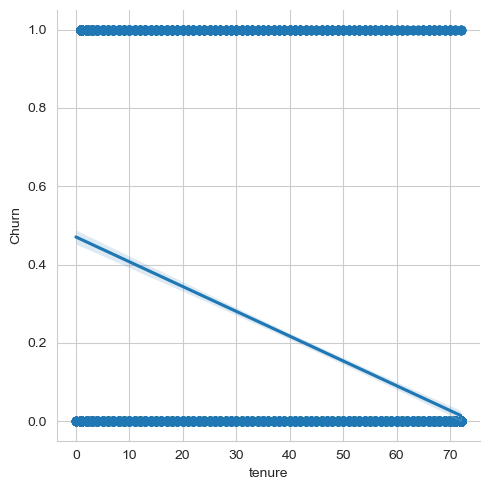

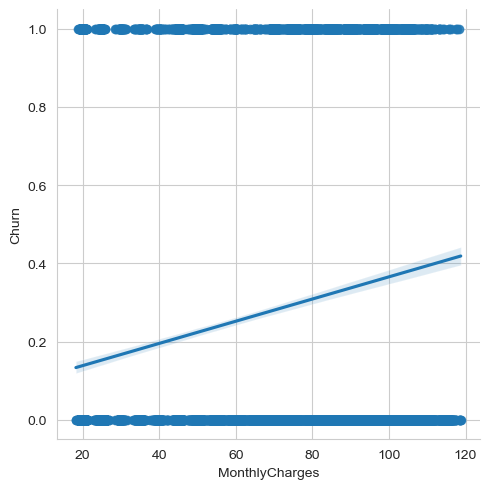

In [4]:
# Assumption:The relationship between the features (predictors) and the target (churn) is linear
sns.lmplot(x='tenure', y='Churn', data=df, logistic=False)
sns.lmplot(x='MonthlyCharges', y='Churn', data=df, logistic=False)

In [5]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

y_pred_binary = np.where(y_pred > 0.5, 1, 0)

linear_accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Linear Regression Accuracy: {linear_accuracy}')

Mean Squared Error: 124448337578529.8
R-squared: -633476936364731.8
Linear Regression Accuracy: 0.7614991482112436


In [6]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': linear_model.coef_})
coefficients['abs_Coefficient'] = np.abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])

                                   Feature   Coefficient
15    DeviceProtection_No internet service -2.117954e+10
17         TechSupport_No internet service  1.505740e+10
10                      InternetService_No  1.081052e+10
21     StreamingMovies_No internet service -1.005960e+10
45                    TotalCharges_1008.55  8.986780e+09
...                                    ...           ...
5385                    TotalCharges_677.9  0.000000e+00
5387                  TotalCharges_6770.85  0.000000e+00
5393                   TotalCharges_6780.1  0.000000e+00
5398                    TotalCharges_679.3  0.000000e+00
6558                    TotalCharges_999.9  0.000000e+00

[6559 rows x 2 columns]


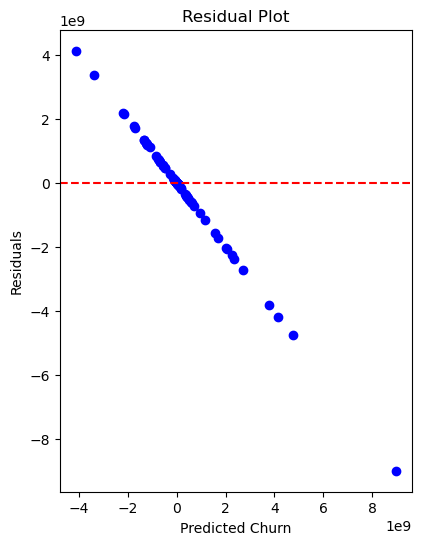

In [8]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Churn')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.show()


Linear regression assumes a linear relationship among features and target variables that may not hold in the context of customer churn because nonlinear interactions of features can influence churn, such as monetary amounts regarding tenure or contract type.

## Logistic Regression

In [ ]:
# Assumption: For logistic regression, you can check this assumption by plotting the relationship between continuous variables (e.g., tenure, MonthlyCharges) and the log-odds of churn.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['tenure_scaled', 'MonthlyCharges_scaled']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges']])
df['log_odds'] = np.log(df['Churn'] / (1 - df['Churn']))

sns.lmplot(x='tenure_scaled', y='log_odds', data=df)
sns.lmplot(x='MonthlyCharges_scaled', y='log_odds', data=df)

In [9]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

logistic_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {logistic_accuracy}')

Accuracy: 0.8035207268597387


In [10]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': logistic_model.coef_[0]})
coefficients['abs_Coefficient'] = np.abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])

                   Feature  Coefficient
1638     TotalCharges_20.2     1.711220
1636     TotalCharges_20.1     1.597612
24       Contract_Two year    -1.213724
1637    TotalCharges_20.15     1.148358
2516   TotalCharges_288.05     1.132690
...                    ...          ...
3531   TotalCharges_411.75     0.000000
3534  TotalCharges_4113.15     0.000000
3535   TotalCharges_4113.7     0.000000
3544  TotalCharges_4122.65     0.000000
6558    TotalCharges_999.9     0.000000

[6559 rows x 2 columns]


Logistic Regression performed better than linear regression in terms of interpretability. Logistic regression is useful to understand the direction of the relationships. Still, it assumes linearity between log-odds of the outcome and the predictors.

## Generalized Additive Model

<Axes: xlabel='tenure', ylabel='Churn'>

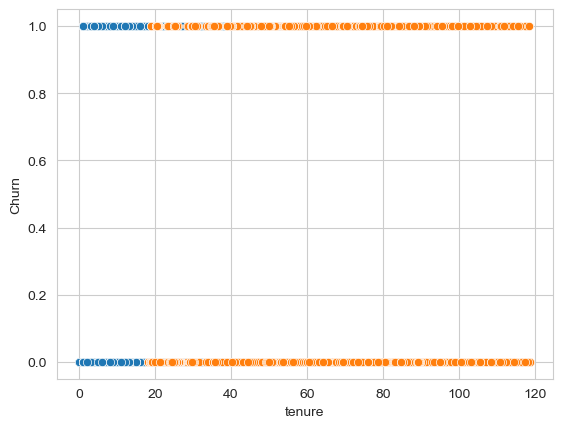

In [8]:
# Assumption: The relationship between the dependent variable and each independent variable can be modeled as an additive function (spline functions for non-linear relationships).

sns.scatterplot(x='tenure', y='Churn', data=df)
sns.scatterplot(x='MonthlyCharges', y='Churn', data=df)

In [12]:
gam = LogisticGAM(s(0) + s(1) + s(2) + s(3) + f(4) + f(5) + f(6) + f(7) + f(8) + f(9))
gam.fit(X_train, y_train)

y_pred_proba = gam.predict_proba(X_test)
y_pred = np.where(y_pred_proba > 0.5, 1, 0)

GAM_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {GAM_accuracy}')

Accuracy: 0.8120386144236229


GAM can model smooth curves for continuous features to provide fuller insight into precisely how the variables are affecting churn. This flexibility in the method means that generally, it performs better than logistic regression, particularly when the relationships in the dataset are complex. Added complexity does come at a slight cost, with it being more difficult to interpret than logistic regression.

## Model Comparison

In [13]:
print(f'Linear Regression Accuracy: {linear_accuracy}')
print(f'Logistic Regression Accuracy: {logistic_accuracy}')
print(f'GAM Accuracy: {GAM_accuracy}')

Linear Regression Accuracy: 0.5883021010789324
Logistic Regression Accuracy: 0.8035207268597387
GAM Accuracy: 0.8120386144236229


Overall Suggestion: GAM
Logistic regression provides a simpler but effective model whereas GAM offers the best balance of flexibility and performance. The choice between models reflects the trade-off between interpretability and performance needed for business decision-making.